# Mount Google Drive

In [8]:
from google.colab import drive
drive.mount('/content/drive')

# Paths
full_data_path = "/content/drive/MyDrive/dogs_n_cats"
reduced_data_path = "/content/reduced_dogs_n_cats"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Imports

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os, random, shutil

random.seed(42)


# Prepare Reduced Dataset

In [14]:
if not os.path.exists(reduced_data_path):
    os.makedirs(reduced_data_path, exist_ok=True)
    for subdir in ["training_set", "test_set"]:
        for label in ["cats", "dogs"]:
            os.makedirs(os.path.join(reduced_data_path, subdir, label), exist_ok=True)

    def copy_random_images(src_dir, dst_dir, n):
        all_imgs = os.listdir(src_dir)
        selected = random.sample(all_imgs, n)
        for img in selected:
            shutil.copy(os.path.join(src_dir, img), os.path.join(dst_dir, img))

    copy_random_images(f"{full_data_path}/training_set/cats", f"{reduced_data_path}/training_set/cats", 250)
    copy_random_images(f"{full_data_path}/training_set/dogs", f"{reduced_data_path}/training_set/dogs", 250)
    copy_random_images(f"{full_data_path}/test_set/cats", f"{reduced_data_path}/test_set/cats", 250)
    copy_random_images(f"{full_data_path}/test_set/dogs", f"{reduced_data_path}/test_set/dogs", 250)

print("Reduced dataset ready!")


Reduced dataset ready!


# Train Model

In [27]:
def build_and_train_model(dataset_path, epochs=5):
    train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )

    test_datagen = ImageDataGenerator(rescale=1./255)

    train_set = train_datagen.flow_from_directory(
        f"{dataset_path}/training_set",
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary'
    )
    test_set = test_datagen.flow_from_directory(
        f"{dataset_path}/test_set",
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary'
    )
    cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    from tensorflow.keras.optimizers import Adam
    cnn.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])


    cnn.fit(train_set, validation_data=test_set, epochs=epochs, verbose=1)

    loss, acc = cnn.evaluate(test_set)
    return acc


# Train on Both Datasets

In [19]:
print("\nTraining on FULL dataset...")
full_acc = build_and_train_model(full_data_path, epochs=10)

print("\nTraining on REDUCED dataset (250 each)...")
reduced_acc = build_and_train_model(reduced_data_path, epochs=15)

print(f"\nFull dataset accuracy: {full_acc*100:.2f}%")
print(f"Reduced dataset accuracy: {reduced_acc*100:.2f}%")



Training on FULL dataset...
Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 158s 490ms/step - accuracy: 0.5198 - loss: 0.6954 - val_accuracy: 0.5400 - val_loss: 0.6788
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 167s 486ms/step - accuracy: 0.6208 - loss: 0.6526 - val_accuracy: 0.6795 - val_loss: 0.6039
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 121s 485ms/step - accuracy: 0.6660 - loss: 0.6120 - val_accuracy: 0.6000 - val_loss: 0.6886
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 121s 486ms/step - accuracy: 0.6705 - loss: 0.6064 - val_accuracy: 0.6585 - val_loss: 0.6309
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 122s 487ms/step - accuracy: 0.6838 - loss: 0.5879 - val_accuracy: 0.6375 - val_loss: 0.6423
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 122s 488ms/step - accuracy: 0.7214 - loss: 0.5524 - val_accuracy: 0.7485 - val_loss: 0.5118
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 121s 482ms/step - accuracy: 0.7196 - loss: 0.5439 - val_accuracy: 0.7915 - val_loss: 0.4645
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 143s 486ms/step - accuracy: 0.7347 -

# Compare Accuracies Visually

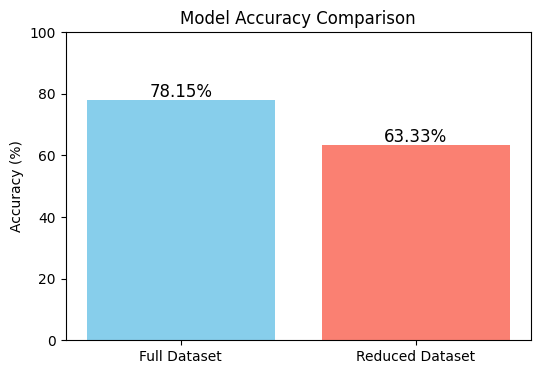

In [20]:
labels = ['Full Dataset', 'Reduced Dataset']
accuracies = [full_acc*100, reduced_acc*100]

plt.figure(figsize=(6,4))
plt.bar(labels, accuracies, color=['skyblue','salmon'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)

for i, v in enumerate(accuracies):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontsize=12)

plt.show()